# Learning Curves Analysis

Notebook ini bertujuan untuk menganalisis hasil training dan validasi model YOLO Emotion Detection melalui learning curves


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
path = 'runs-2\content\\runs\detect\\train\\results.csv'
df = pd.read_csv(path)
df.head() 

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,34.4738,1.14834,7.17674,0.02006,0.00316,0.91338,0.17113,0.12048,1.06228,3.44437,0.01768,0.000300,0.000300,0.000300
1,2,66.9577,1.13854,5.58285,0.01949,0.34061,0.38806,0.37560,0.23589,1.24279,2.20583,0.02560,0.000597,0.000597,0.000597
2,3,98.3726,1.18203,4.44130,0.02113,0.37189,0.44606,0.42011,0.26669,1.32277,1.89051,0.02603,0.000888,0.000888,0.000888
3,4,130.0510,1.22923,3.46700,0.02132,0.48998,0.47453,0.50580,0.33442,1.23127,1.77350,0.02283,0.000882,0.000882,0.000882
4,5,160.5150,1.20286,2.73273,0.02136,0.57921,0.59789,0.58136,0.37708,1.29385,1.51894,0.02543,0.000873,0.000873,0.000873


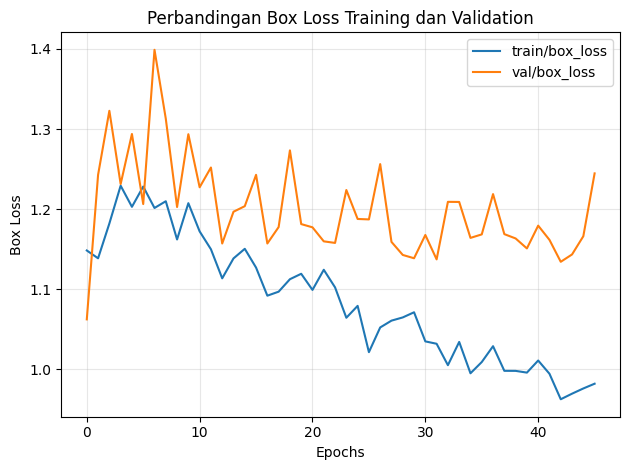

In [ ]:
ax = df[['train/box_loss','val/box_loss']].plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Box Loss')
ax.set_title('Perbandingan Box Loss Training dan Validation')
ax.grid(alpha=0.3)
plt.tight_layout() 
plt.show()

- Model belajar dengan baik di data latih, tapi kesulitan mempertahankan performa di data validasi.
- Fluktuasi validation loss bisa disebabkan oleh:
    - distribusi data validasi berbeda dengan data latih,
    - jumlah data validasi relatif kecil,
    - atau model terlalu kompleks untuk variasi dataset.
- **Overfitting** mulai muncul setelah beberapa epoch, ditandai dengan training loss terus turun sementara validation loss stagnan / naik.

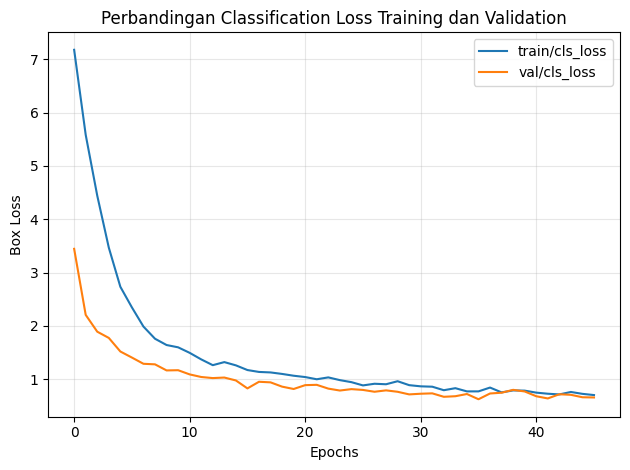

In [16]:
ax = df[['train/cls_loss','val/cls_loss']].plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Box Loss')
ax.set_title('Perbandingan Classification Loss Training dan Validation')
ax.grid(alpha=0.3)
plt.tight_layout() 
plt.show()

- Model stabil, baik training maupun validation loss sama‑sama turun proses belajar berjalan efektif.
- Generalization cukup baik, validation loss mengikuti tren training loss, artinya model tidak hanya menghafal data latih.
- Fluktuasi kecil di validation, wajar karena jumlah data validasi lebih sedikit, tapi tren keseluruhan tetap menurun.
- Potensi perbaikan, bisa ditingkatkan dengan menambah data validasi atau menggunakan learning rate scheduler agar kurva lebih halus.
- Grafik ini menunjukkan **good fit**, model belajar dengan baik di data latih dan mampu generalisasi ke data validasi tanpa tanda overfitting yang jelas

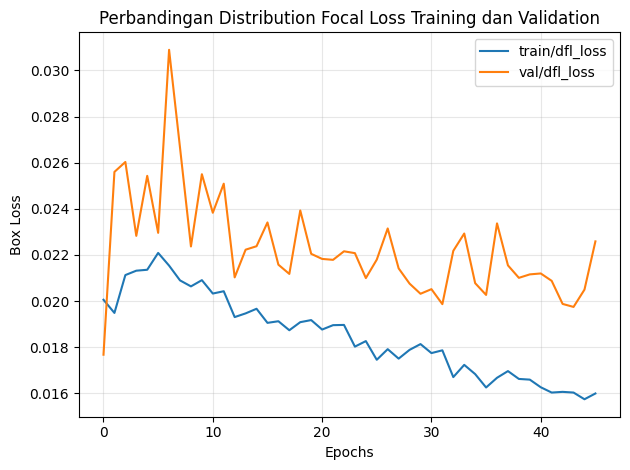

In [17]:
ax = df[['train/dfl_loss', 'val/dfl_loss']].plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Box Loss')
ax.set_title('Perbandingan Distribution Focal Loss Training dan Validation')
ax.grid(alpha=0.3)
plt.tight_layout() 
plt.show()

- Model belajar efektif, training loss turun konsisten, menunjukkan bahwa proses update parameter oleh optimizer berjalan efektif.
- Generalization cukup baik, validation loss ikut menurun, kemungkinan karena jumlah data validasi lebih kecil atau variasi lebih tinggi.
- Stabilitas, fluktuasi di validation loss menunjukkan model belum sepenuhnya stabil, tapi tren keseluruhan tetap positif.
- Potensi perbaikan, bisa dicoba menambah data validasi atau augmentasi agar kurva lebih halus.
- Grafik ini menunjukkan **good fit** dengan sedikit noise, model belajar dengan baik di data latih dan masih mampu generalisasi ke data validasi, tanpa tanda overfitting yang signifikan